Aim: Apply Clustering Techniques for selected datasets. 
Implement K-Means Algorithm cluster the following eight points (with (x; y) representing location) into three clusters.
A1(2; 10);A2(2; 5);A3(8; 4);
B1(5; 8);B2(7; 5);B3(6; 4);
C1(1; 2);C2(4; 9):
The distance function is Euclidean distance. Suppose initially we assign A1, B1, and C1 as the center of each cluster, respectively. Use the k-means algorithm to show the three cluster centers and the all the points of clusters after the 2nd round of execution.


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
 
#Load Data
data = np.array([[2, 10], [2, 5], [8, 4],[5, 8], [7, 5], [6, 4],[1,2],[4,9]])

 
#Transform the data
df = data
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label='cluster heads')
plt.legend()
plt.show()

In [ ]:
#Loading the required modules
 
import numpy as np
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt
 
#Defining our function 
def kmeans(x,k,centroids):
    #idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[centroids]
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
  
    #Step 4
    
    while(True):
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)

        centroids = np.vstack(centroids) #Updated Centroids 
          
        distances = cdist(x, centroids ,'euclidean')

        new_points = np.array([np.argmin(i) for i in distances])
        if (new_points==points).all():
          points = np.array([np.argmin(i) for i in distances])
          break
        points = np.array([np.argmin(i) for i in distances])

    return (centroids,points)
 
 

  
#Transform the data
df = np.array([[2, 10], [2, 5], [8, 4],[5, 8], [7, 5], [6, 4],[1,2],[4,9]])
 
#Applying our function
centroid,label = kmeans(df,3,[0,3,6])
print("LABELS GIVEN:",label)
#Visualize the results
 
u_labels = np.unique(label)
print("UNIQUE LABELS",u_labels)
print("CENTROIDS",centroid)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
# for i in centroid:
#   plt.scatter(i[0] , i[1] , label = 'HEAD')

plt.scatter(centroid[:,0] , centroid[:,1] , label = 'HEAD')

plt.legend()
plt.show()

In [ ]:
#my implementation
 
import numpy as np
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt
 
#Defining our function 
def kmeans(x,k,centroids):
    #idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[centroids]
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
  
    #Step 4
    
    for j in range(2):
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)

        centroids = np.vstack(centroids) #Updated Centroids 
          
        distances = cdist(x, centroids ,'euclidean')

        new_points = np.array([np.argmin(i) for i in distances])
        if (new_points==points).all():
          points = np.array([np.argmin(i) for i in distances])
          break
        points = np.array([np.argmin(i) for i in distances])

    return (centroids,points)
 
 

  
#Transform the data
df = np.array([[2, 10], [2, 5], [8, 4],[5, 8], [7, 5], [6, 4],[1,2],[4,9]])
 
#Applying our function
centroid,label = kmeans(df,3,[0,3,6])
print("LABELS GIVEN:",label)
#Visualize the results
 
u_labels = np.unique(label)
print("UNIQUE LABELS",u_labels)
print("CENTROIDS",centroid)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
# for i in centroid:
#   plt.scatter(i[0] , i[1] , label = 'HEAD')

plt.scatter(centroid[:,0] , centroid[:,1] , label = 'HEAD')

plt.legend()
plt.show()

In [ ]:
#SOMEONE ELSE's IMPLEMENTATION:
import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)

The dataset contains details of the eruption duration and the waiting time in between eruptions of the Old Faithful Geyser

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

# Import the data
df = pd.read_csv('../input/old-faithful/faithful.csv')

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

In [ ]:
# Standardize the data
X_std = StandardScaler().fit_transform(df)

# Run local implementation of kmeans
km = Kmeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = km.centroids

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

#the output will depend on initial initialization of the centroid. 

In [ ]:
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    km = Kmeans(n_clusters=2,
                max_iter=3,
                random_state=np.random.randint(0, 1000, size=1))
    km.fit(X_std)
    centroids = km.centroids
    centers.append(centroids)
    ax[i].scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
                  c='green', label='cluster 1')
    ax[i].scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
                  c='blue', label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='lower right')
    ax[i].set_title(f'{km.error:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout();

In [ ]:
# Read the image
img = imread('https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png')
img_size = img.shape

# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])

# Run the Kmeans algorithm
km = KMeans(n_clusters=30)
km.fit(X)

# Use the centroids to compress the image
X_compressed = km.cluster_centers_[km.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Reshape X_recovered to have the same dimension as the original image 128 * 128 * 3
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 30 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

OTHER RESULTS:

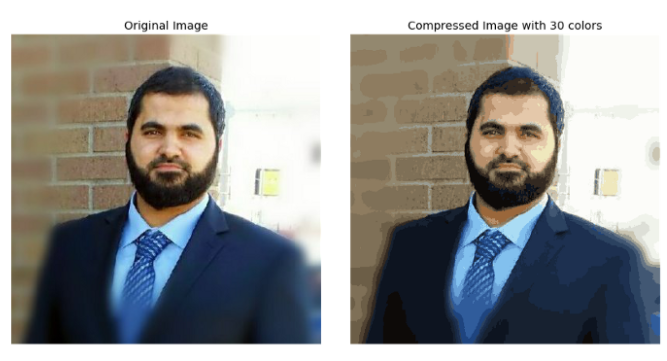

In [ ]:
#SAMPLE FOR ELBOW METHOD:
import matplotlib.pyplot as plt 
from matplotlib import style
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
  
style.use("fivethirtyeight")
  
# make_blobs() is used to generate sample points
# around c centers (randomly chosen)
X, y = make_blobs(n_samples = 100, centers = 4, 
                cluster_std = 1, n_features = 2)
                  
plt.scatter(X[:, 0], X[:, 1], s = 30, color ='b')
  
# label the axes
plt.xlabel('X')
plt.ylabel('Y')
  
plt.show()
plt.clf() # clear the figure

In [ ]:
cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(X)
      
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)     
  
# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.show() # clear the plot
  
# the point of the elbow is the 
# most optimal value for choosing k

In [ ]:
#ANOTHER METHOD IS The Silhouette Method
from sklearn.datasets import make_blobs

# Create dataset with 3 random cluster centers and 1000 datapoints
x, y = make_blobs(n_samples = 1000, centers = 3, n_features=2, shuffle=True, random_state=31)

from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(x)
  labels = kmeans.labels_
  sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# plot the cost against K values
plt.plot(range(2, kmax+1), sil, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.show() # clear the plot

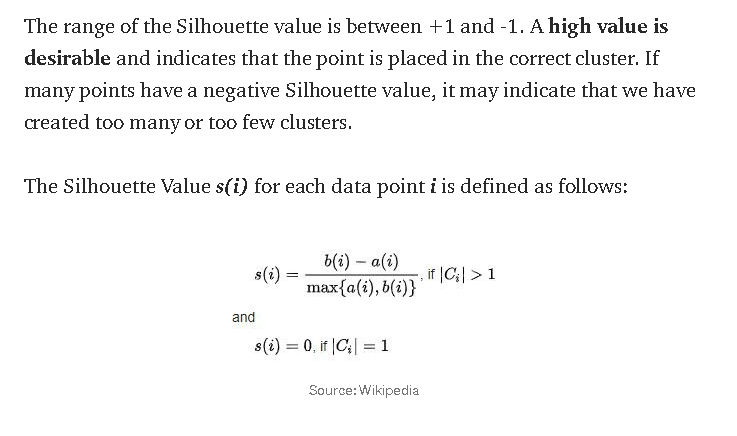

CONCLUSION:::Kmeans clustering is one of the most popular clustering algorithms and usually the first thing practitioners apply when solving clustering tasks to get an idea of the structure of the dataset. The goal of kmeans is to group data points into distinct non-overlapping subgroups. It does a very good job when the clusters have a kind of spherical shapes. However, it suffers as the geometric shapes of clusters deviates from spherical shapes. Moreover, it also doesn’t learn the number of clusters from the data and requires it to be pre-defined. To be a good practitioner, it’s good to know the assumptions behind algorithms/methods so that you would have a pretty good idea about the strength and weakness of each method. This will help you decide when to use each method and under what circumstances. In this post, we covered both strength, weaknesses, and some evaluation methods related to kmeans.

Scale/standardize the data when applying kmeans algorithm.
Elbow method in selecting number of clusters doesn’t usually work because the error function is monotonically decreasing for all ks.

Kmeans gives more weight to the bigger clusters.
Kmeans assumes spherical shapes of clusters (with radius equal to the distance between the centroid and the furthest data point) and doesn’t work well when clusters are in different shapes such as elliptical clusters.

If there is overlapping between clusters, kmeans doesn’t have an intrinsic measure for uncertainty for the examples belong to the overlapping region in order to determine for which cluster to assign each data point.

Kmeans may still cluster the data even if it can’t be clustered such as data that comes from uniform distributions.